---
# **SONG POPULARITY PREDICTOR**
###**Summer 2025 Data Science Project**
###**Authors:** Leyan Lyu, Jennifer Ding, Justyn Liversage, Tram Le  
  
###**Contributions:**
**Leyan**:
Contributed to the initial project concept of analyzing Spotify music data to explore patterns in song popularity, genre trends, and audio features over time. Collected relevant Spotify datasets from Kaggle and helped define the central thesis question using exploratory visualizations to guide the direction of analysis. Developed machine learning models aimed at predicting song popularity based on audio features. Split the data into training and testing sets, and evaluated model performance using appropriate metrics. Created visualizations to support analysis and interpretation of trends and model results, contributing to the overall understanding and presentation of findings.


**Jennifer:**
Helped come up with project idea, created dataset and processed/cleaned the data (also sorted data into average, unpopular, and popular labels), created kde plots and insights for each of the features for data exploration to see if there were differences between the popularity groups for each feature, helped create the linear regression plots, contributed to ML design/development (encoded genre to be used for ML model and tested different parameters for the model to optimize it), wrote insights for ML analysis, wrote insights and conclusions, wrote introduction + insights + conclusion for final checkpoint and formatted it with explanations.


**Justyn:** Project Idea: Suggested we make a popularity predictor, based on a teammate's idea of "Music" as a theme. Found the dataset that was used on Kaggle.   

Data Curation: Refactored the code for the popularity label classification and created a single sampling loop to build sampled_df.  

Data Exploration and Summary Statistics: Labeled visualizations, changed some visualization types for clarity, created hypothesis test #3, and added reject/fail to reject logic to the hypothesis test code. Wrote interpretations/insights for the correlation matrix and the linear regression section, and commented the hypothesis test code.

ML Agorithm Design/Development: Came up with the idea to use Logistic Regression as a baseline.  

ML Algorithm Training and Test Data Analysis: Added the Logistic Regression code. Edited existing interpretation of the Random Forest classification report analysis to include an analysis and comparison for the Logistic Regression model's performance.  

Visualization, Result Analysis, Conclusion: Created interpretations/analysis for all the visualizations. Added a lot to the insights and conclusions section.  

Final Tutorial Report Creation: Slightly modified formatting to look better.
  
  
**Tram**: Contributed to shaping project ideas, supported data preprocessing to ensure consistency, assisted in curating and exploring datasets to evaluate feature relationships using correlation matrices, aided in developing linear regression models for comparing patterns across different labels, and helped refine the final tutorial.

---

#**Introduction**
Music is a large part of everyday life. It has shaped cultures and identities while also being a form of self-expression and entertainment. Because society changes over time, the type of music that is considered popular also changes over time. Popular songs tend to generate more revenue for their respective artists and labels because there are more user interactions with the song, whether through direct merchandise, concerts, or through music streaming platforms such as Spotify.
Since music is widespread and often involved in everyday lives, this project aims to answer the question: **What song features make a song more likely to be popular? (Top 20% popularity).**
The Song Popularity Predictor will provides users a prediction on how popular a song may be based on certain features of their song. With this knowledge, music artists may have more insight on what song features the general population tends to favor, enabling them to produce songs that are more likely to be well-received by the public.

---



#**Data Curation:**
###### The raw data was taken from the [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data) by MaharshiPandya. The raw data is a dataset listing 89,741 unique songs on Spotify and their respective popularity and song features.
---


In [1]:
#### Imports ###
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load and trim the dataset into the necessary 7 columns (features)
spotify_df = pd.read_csv('dataset.csv')
spotify_df = spotify_df[['track_id', 'popularity', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'track_genre']]

# Remove duplicates
spotify_df = spotify_df.drop_duplicates()
# Check the types of the DataFrame
spotify_df.dtypes

track_id             object
popularity            int64
danceability        float64
energy              float64
acousticness        float64
instrumentalness    float64
track_genre          object
dtype: object

### Preparing Data for Exploration, Analysis, and Machine Learning
According to [Musicstax](https://musicat.musicstax.com/what-is-a-good-spotify-popularity-score), a song with a popularity score of 30 is in the top 11.50% of songs, while a song with a popularity score of 3 is in the bottom 28% of songs. This information was used to categorize songs as `'Popular'` and `'Unpopular'` with songs in between the threshold labeled as `'Average'`. However, an important note is that the dataset is likely to include more `'Popular`' songs by nature as Spotify will surface popular songs more often than average or unpopular songs, resulting in the data skewing towards popular songs.

popularity_label
Popular      63459
Average      30536
Unpopular    19555
Name: count, dtype: int64


<Axes: title={'center': 'Popularity Label Distribution'}, xlabel='popularity_label'>

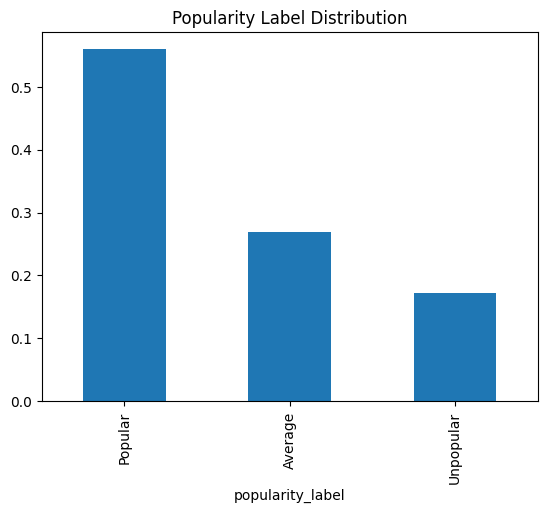

In [3]:
# Classify a track's popularity score into:
#   - "Popular"   for popularity >= 30
#   - "Unpopular" for popularity <= 3
#   - "Average"   otherwise

def label_popularity (popularity):
  if popularity >= 30: # Popular case
    return "Popular"
  elif popularity <= 3: # Unpopular case
    return "Unpopular"
  else:
    return "Average" # Average case

# Apply the function to every row, creating a new column
spotify_df['popularity_label'] = spotify_df['popularity'].apply(label_popularity)
spotify_df # Display the DataFrame

# Show class distribution
print(spotify_df['popularity_label'].value_counts())
spotify_df['popularity_label'].value_counts(normalize = True).plot(kind = 'bar', title = 'Popularity Label Distribution')

In the dataset, the `track_genre` is a string. In order to utilize this feature for our Random Forest machine learning model later, it will be encoded into a number using target encoding with the median song popularity of the respective track genres.

In [4]:
# Add a column for the median popularity of each genre. This will be used in the ML training later.

genre_group = spotify_df.groupby('track_genre')['popularity'].median()
spotify_df['genre_encoded'] = spotify_df['track_genre'].map(genre_group)
display(spotify_df)

,track_id,popularity,danceability,energy,acousticness,instrumentalness,track_genre,popularity_label,genre_encoded
0,5SuOikwiRyPMVoIQDJUgSV,73,0.676,0.4610,0.0322,0.000001,acoustic,Popular,47.0
1,4qPNDBW1i3p13qLCt0Ki3A,55,0.420,0.1660,0.9240,0.000006,acoustic,Popular,47.0
2,1iJBSr7s7jYXzM8EGcbK5b,57,0.438,0.3590,0.2100,0.000000,acoustic,Popular,47.0
3,6lfxq3CG4xtTiEg7opyCyx,71,0.266,0.0596,0.9050,0.000071,acoustic,Popular,47.0
4,5vjLSffimiIP26QG5WcN2K,82,0.618,0.4430,0.4690,0.000000,acoustic,Popular,47.0
...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,21,0.172,0.2350,0.6400,0.928000,world-music,Average,44.0
113996,1hIz5L4IB9hN3WRYPOCGPw,22,0.174,0.1170,0.9940,0.976000,world-music,Average,44.0
113997,6x8ZfSoqDjuNa5SVP5QjvX,22,0.629,0.3290,0.8670,0.000000,world-music,Average,44.0
113998,2e6sXL2bYv4bSz6VTdnfLs,41,0.587,0.5060,0.3810,0.000000,world-music,Popular,44.0


### Creating a Sample Dataset for Easier Visualization

A sample dataset with equal amounts of samples from the `Popular`, `Average`, and `Unpopular` categories. This sample dataset will help to explore possible trends in the data.

In [5]:
# Get a sample from each popularity category, then combine them all into one DataFrame
# ------------------------------------------------------------------------------------

# Sample 30 from each popularity category
samples = []
for label in ["Popular", "Average", "Unpopular"]:
  subset = spotify_df[spotify_df['popularity_label'] == label]
  pick   = subset.sample(n = 30, random_state = 42)
  samples.append(pick)

# Concatenate all samples into one DataFrame
sampled_df = pd.concat(samples, ignore_index = True)

# Check that there are 30 samples for each category
print(sampled_df['popularity_label'].value_counts())

# Display the sampled_df
print("\n\nsampled_df: ")
display(sampled_df)

popularity_label
Popular      30
Average      30
Unpopular    30
Name: count, dtype: int64


sampled_df: 


,track_id,popularity,danceability,energy,acousticness,instrumentalness,track_genre,popularity_label,genre_encoded
0,5QXQy0f2q8wJNpPwJtjifx,59,0.789,0.694,0.0982,0.000000,electronic,Popular,48.0
1,6yvxu91deFKt3X1QoV6qMv,76,0.608,0.757,0.2590,0.002160,hip-hop,Popular,58.0
2,7c7M7iBp39zQH1v4FmuG2L,48,0.636,0.925,0.5660,0.000000,sertanejo,Popular,47.0
3,7dJLRobSnGBar7G1YhsId9,45,0.497,0.924,0.0920,0.000000,j-rock,Popular,37.0
4,2p9P80g69GvL8fcIaBC7nu,48,0.526,0.464,0.3590,0.001670,indie-pop,Popular,47.0
...,...,...,...,...,...,...,...,...,...
85,4EnQAiXohslu2A6wMXV3zM,0,0.537,0.888,0.1010,0.000015,spanish,Unpopular,32.0
86,0FN8wmJDeK8dlWa1mkrkLk,0,0.501,0.131,0.9940,0.000162,romance,Unpopular,0.0
87,3ksIpMf8hNYWAyTiMZJ6Xb,0,0.677,0.744,0.0405,0.000153,electro,Unpopular,50.5
88,3OJG7Q6YeJJogzBv7uLAAk,0,0.475,0.715,0.0863,0.000027,electronic,Unpopular,48.0


#**Exploratory Data Analysis:**
---

To visualize any possible patterns or trends in the data, plots were created to visualize the sampled dataset `sampled_df`.

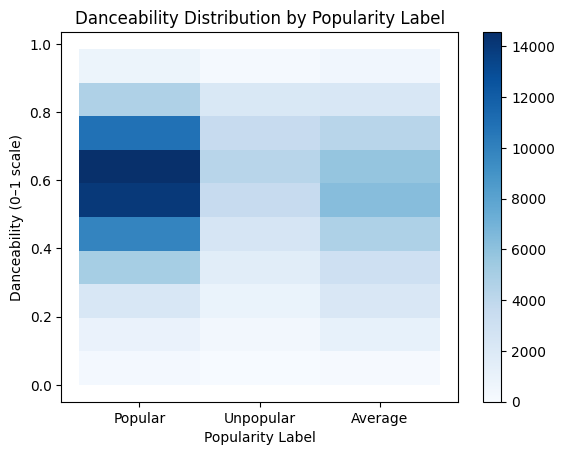

In [6]:
sns.histplot(data=spotify_df, x='popularity_label', y='danceability', bins=10, cmap='Blues', cbar=True)

plt.title('Danceability Distribution by Popularity Label')
plt.xlabel('Popularity Label')
plt.ylabel('Danceability (0–1 scale)')
plt.show()

The heatmap reveals that popular songs are most concentrated in the 0.6–0.7 danceability range, indicating a strong preference for tracks with moderate to high danceability. In contrast, unpopular and average songs show a more even or dispersed distribution across danceability values, with fewer tracks in the higher range. This pattern supports the idea that higher danceability is positively associated with song popularity, aligning with previous statistical results.

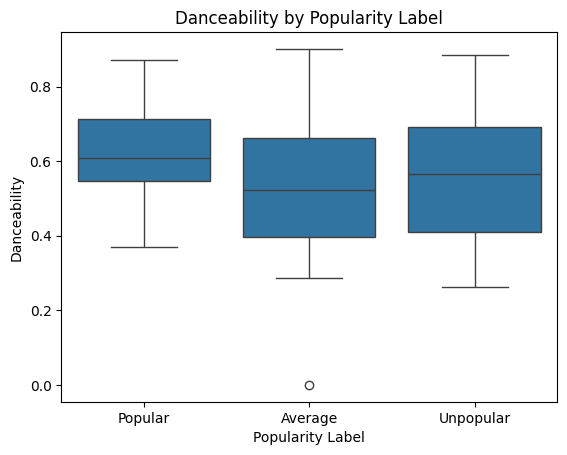

In [7]:
sns.boxplot(data=sampled_df, x="popularity_label", y="danceability")
plt.title("Danceability by Popularity Label")
plt.xlabel("Popularity Label")
plt.ylabel("Danceability")
plt.show()

In our sample, popular songs tend to have higher danceability compared to average and unpopular songs. The median danceability is noticeably higher for popular tracks which means more consistency in danceability. Unpopular songs show a wider spread and lower overall danceability, indicating more variability and less emphasis on rhythmic features.

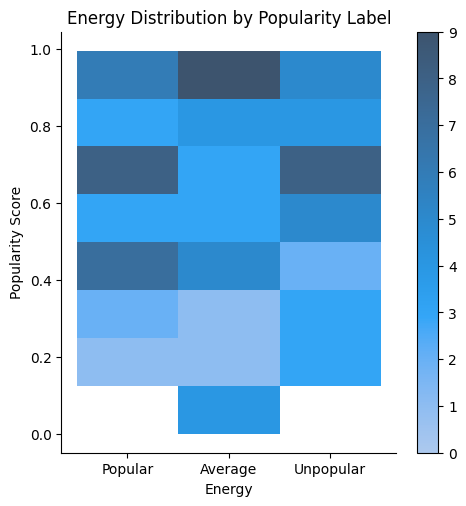

In [8]:
# Plot: Energy vs. Popularity by Popularity Label
energy_plot = sns.displot(data = sampled_df, x = "popularity_label", y = "energy", cbar= True)
plt.title("Energy Distribution by Popularity Label")
plt.xlabel("Energy")
plt.ylabel("Popularity Score")
#sns.move_legend(energy_plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In our sample, average songs tend to have energy between 0.9-1.0, while unpopular songs tend to have energy around 0.7. Popular songs seem to have two "clusters" at around 0.7 and 0.45. However, they would most likely average to close to 0.6.

Text(0.5, 1.0, 'Energy Distribution by Popularity Label')

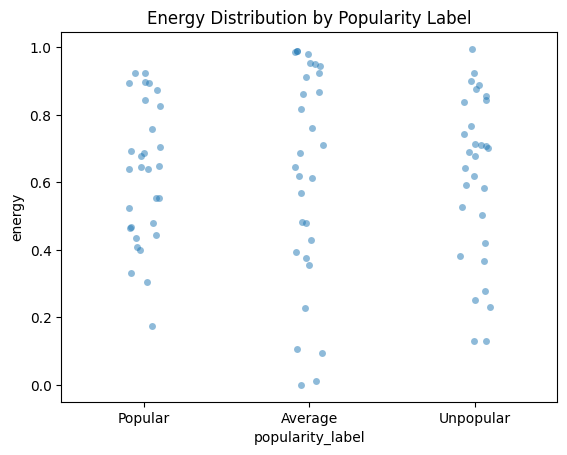

In [9]:
sns.stripplot(data=sampled_df, x="popularity_label", y="energy", jitter=True, alpha=0.5)
plt.title("Energy Distribution by Popularity Label")


In our sample, popular songs generally exhibit higher energy levels, with most values concentrated between 0.6 and 1.0. In contrast, average and unpopular songs display more variation, including lower energy values. This suggests that higher energy might be a contributing factor to a song’s popularity.

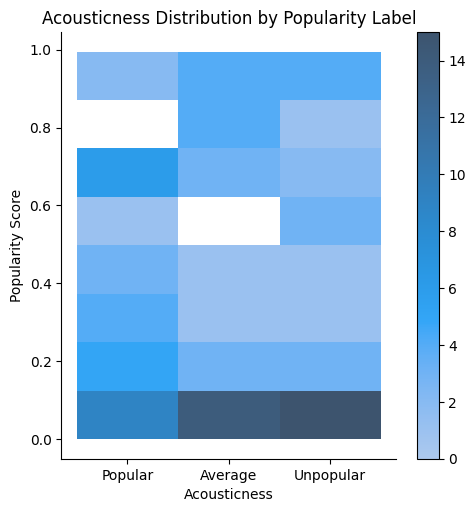

In [10]:
# Plot: Acousticness vs. Popularity by Popularity Label
acoustic_plot = sns.displot(data = sampled_df, x = "popularity_label", y = "acousticness", cbar=True)
plt.title("Acousticness Distribution by Popularity Label")
plt.xlabel("Acousticness")
plt.ylabel("Popularity Score")
#sns.move_legend(acoustic_plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In our sample, unpopular songs and average songs seem to have little to no acousticness score, while popular songs vary.

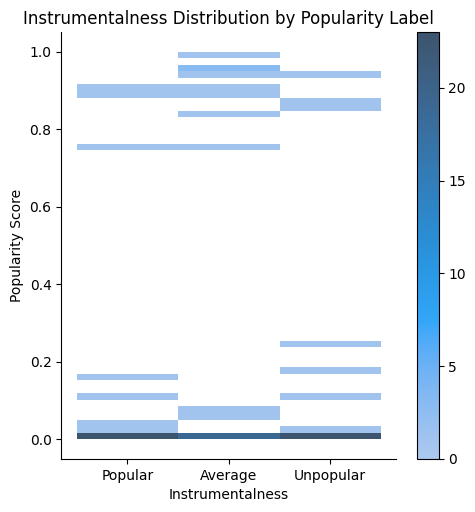

In [11]:
# Plot: Instrumentalness vs. Popularity by Popularity Label
instrumental_plot = sns.displot(data = sampled_df, x = "popularity_label", y = "instrumentalness", cbar=True)
plt.title("Instrumentalness Distribution by Popularity Label")
plt.xlabel("Instrumentalness")
plt.ylabel("Popularity Score")
#sns.move_legend(instrumental_plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In our sample, the majority of songs have little to no instrumentalness.

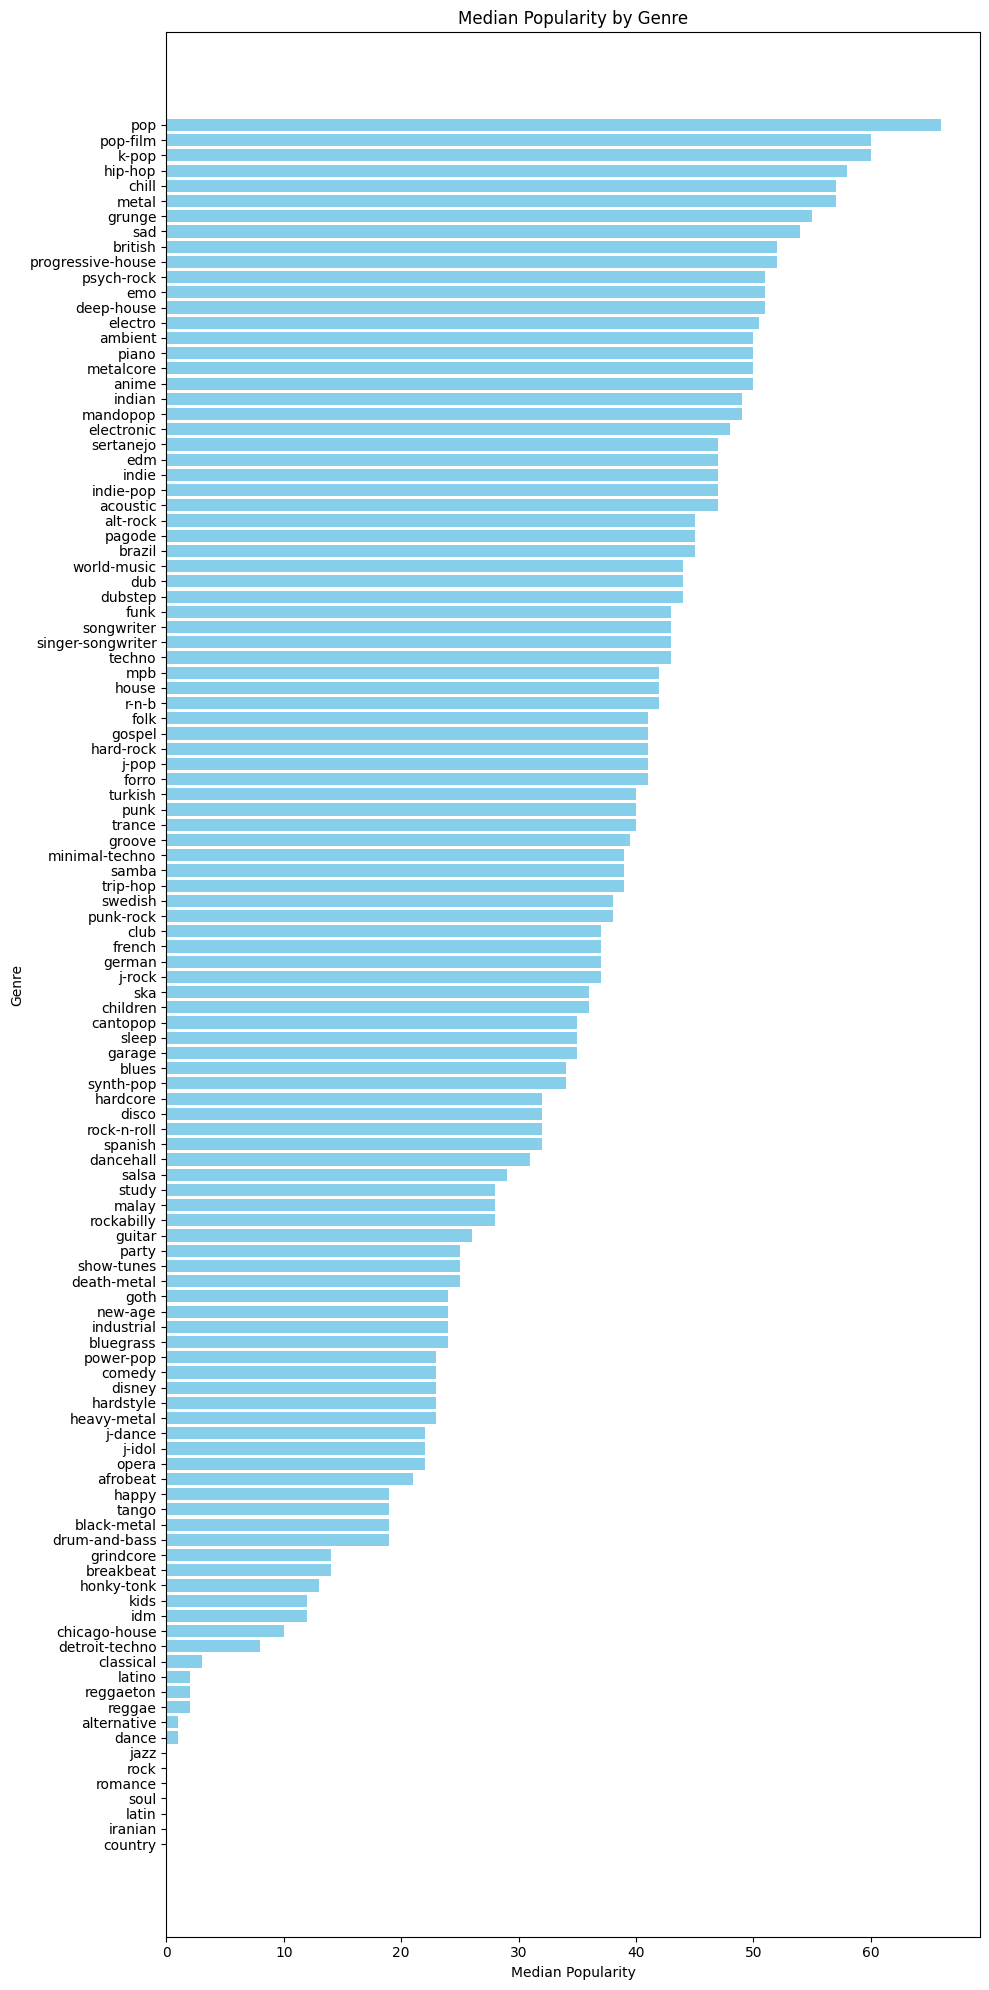

In [12]:
# Plot: Genre vs. Median Popularity
median_by_genre = spotify_df.groupby('track_genre')['popularity'].median().sort_values()
plt.figure(figsize=(10, 20))
plt.barh(median_by_genre.index, median_by_genre.values, color='skyblue')
plt.xlabel("Median Popularity")
plt.ylabel("Genre")
plt.title("Median Popularity by Genre")
plt.tight_layout() # Fixes some overlapping issues
plt.show()

From the chart above, songs in different genres tend to have a higher median popularity, suggesting that the genre of a song plays a role in a song's potential popularity. For instance, songs that are in the pop or pop-film genre have a much higher average popularity than songs in the iranian or romance genre.

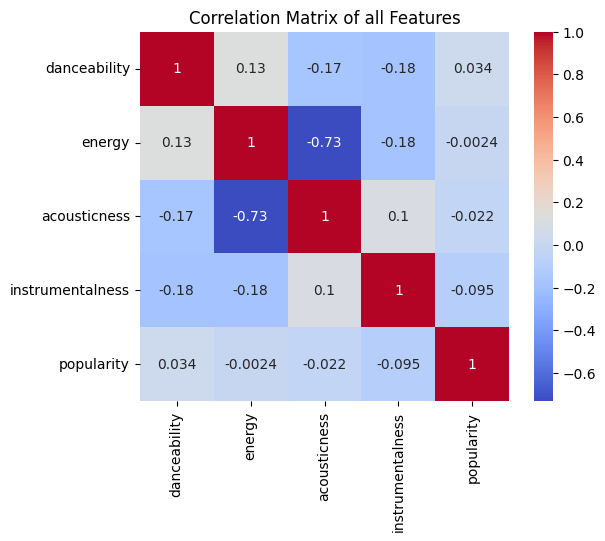

In [13]:
# Correlation map between all features
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'popularity']

corr = spotify_df[features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of all Features")
plt.show()

####**Insights from the Correlation Matrix:**  
This correlation matrix shows that none of the audio features on their own have a strong linear relationship with popularity. The clearest signal from the matrix is the relationship between energy and acousticness, telling us that high energy songs are often low-acousticness and vice versa. As popularity correlations are near-zero, we know that we are unable to rely on a single audio metric to predict a popularity score.

###**Linear Regression:**
---

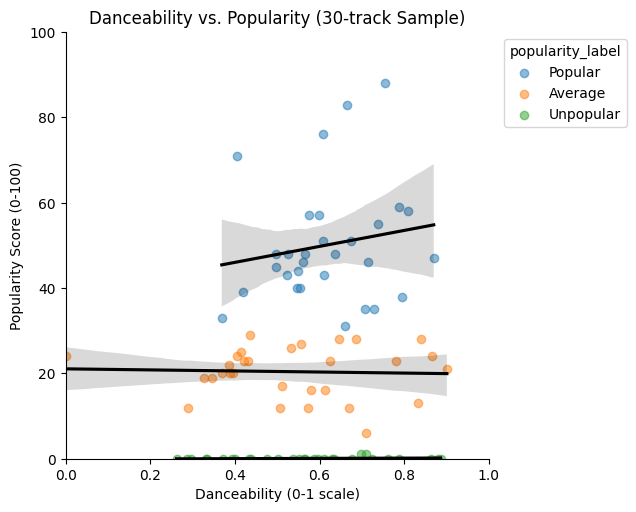

In [14]:
# Linear Regression: Danceability vs. Popularity
# Uses sampled_df to make the plot clear and readable

sns.lmplot(data=sampled_df, x='danceability', y='popularity', hue='popularity_label', scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, legend = False)

plt.title("Danceability vs. Popularity (30-track Sample)")
plt.xlabel("Danceability (0-1 scale)")
plt.ylabel("Popularity Score (0-100)")
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.legend(title = "popularity_label", loc = "upper left", bbox_to_anchor = (1.02, 1))
plt.show()

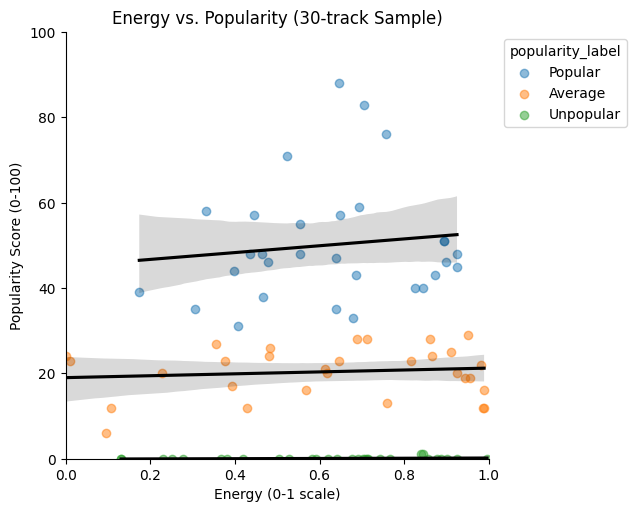

In [15]:
# Linear Regression: Energy vs. Popularity
# Uses sampled_df to make the plot clear and readable

sns.lmplot(data=sampled_df, x='energy', y='popularity', hue='popularity_label', scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, legend = False)

plt.title("Energy vs. Popularity (30-track Sample)")
plt.xlabel("Energy (0-1 scale)")
plt.ylabel("Popularity Score (0-100)")
plt.legend(title = "popularity_label", loc = "upper left", bbox_to_anchor = (1.02, 1))
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.show()

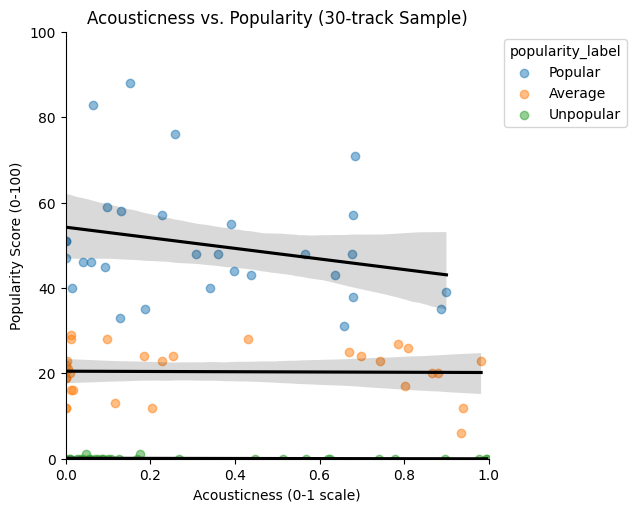

In [16]:
# Linear Regression: Acousticness vs. Popularity
# Uses sampled_df to make the plot clear and readable

sns.lmplot(data=sampled_df, x='acousticness', y='popularity', hue='popularity_label', scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, legend = False)

plt.title("Acousticness vs. Popularity (30-track Sample)")
plt.xlabel("Acousticness (0-1 scale)")
plt.ylabel("Popularity Score (0-100)")
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.legend(title = "popularity_label", loc = "upper left", bbox_to_anchor = (1.02, 1))
plt.show()

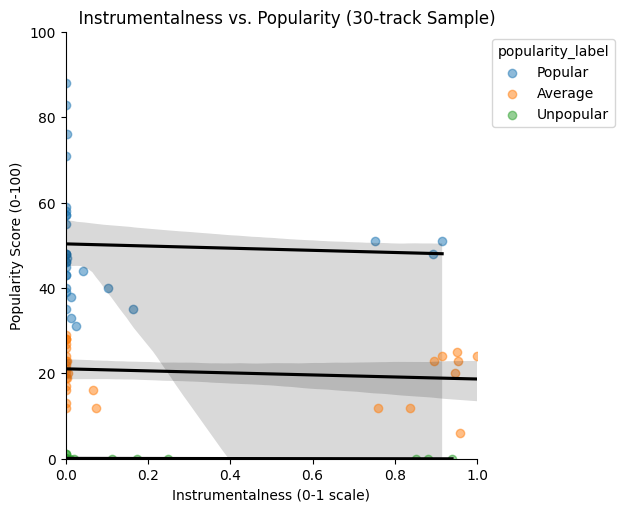

In [17]:
# Linear Regression: Instrumentalness vs. Popularity
# Uses sampled_df to make the plot clear and readable

sns.lmplot(data=sampled_df, x='instrumentalness', y='popularity', hue='popularity_label', scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, legend = False)

# Note: The closer instrumentalness is to 1.0, the more likely the track does not contain vocals
plt.title("      Instrumentalness vs. Popularity (30-track Sample)")
plt.xlabel("Instrumentalness (0-1 scale)")
plt.ylabel("Popularity Score (0-100)")
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.legend(title = "popularity_label", loc = "upper left", bbox_to_anchor = (1.02, 1))
plt.show()

As popular tracks cluster at the low end of the instrumentalness scale, this shows that popular tracks are likely to contain vocals. This differs from the lower popularity groups, where the clustering is not as extreme. As instrumentalness rises (chance of vocals decreases), the chance of the song being a popular hit drastically decreases.

### Some Core Takeaways From Exploratory Data Analysis and Hypothesis Tests
The dataset includes 114,000 tracks with numerical and categorical features. Some genres are over-represented.
Features like danceability and energy correlate positively with popularity. High-energy songs show significantly higher average popularity (t-test, p < 0.05), suggesting energy is a strong predictor.

###**Hypothesis Tests:**
---

###**Hypothesis Test 1: Do Popular and Unpopular Songs Have Different Danceability?**



T-test result: t-statistic = -5.334, p-value = 0.0000
As the p-value is less than 0.01, we reject H0. Danceability differs between popular and unpopular songs.
Median danceability for popular songs: 0.59
Median danceability for unpopular songs: 0.60


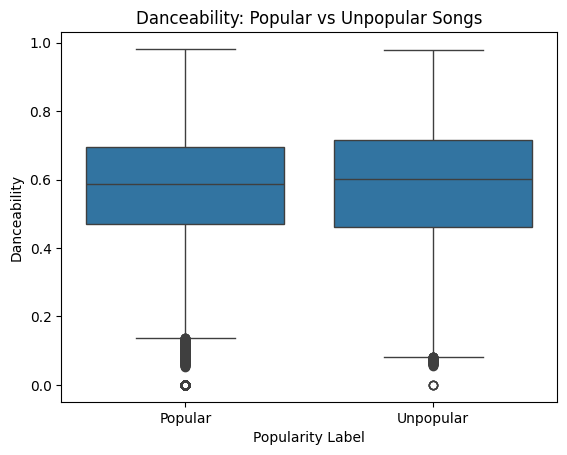

In [18]:
# Hypothesis: Popular songs (>=30) have higher danceability than unpopular songs (<=3)

from scipy.stats import ttest_ind

# Subset to only "Popular" and "Unpopular"
explicit_df = spotify_df[spotify_df['popularity_label'].isin(['Popular', 'Unpopular'])]

# Extract danceability values for each group
pop_dance = explicit_df[explicit_df['popularity_label'] == 'Popular']['danceability']
unpop_dance = explicit_df[explicit_df['popularity_label'] == 'Unpopular']['danceability']

# Perform t-test
alpha = 0.01
t_stat1, p_val1 = ttest_ind(pop_dance, unpop_dance)

# Interpret the t-test result
print(f"T-test result: t-statistic = {t_stat1:.3f}, p-value = {p_val1:.4f}")
if p_val1 < alpha:
  print(f"As the p-value is less than {alpha:.2}, we reject H0. Danceability differs between popular and unpopular songs.")
else:
  print(f"As the p-value is greater than or equal to {alpha:.2}, we fail to reject H0. There is no significant difference in danceability between popular and unpopular songs.")

# Print median scores
pop_median = pop_dance.median()
unpop_median = unpop_dance.median()
print(f"Median danceability for popular songs: {pop_median:.2f}")
print(f"Median danceability for unpopular songs: {unpop_median:.2f}")

# Create boxplot
sns.boxplot(data=explicit_df, x='popularity_label', y='danceability')
plt.title('Danceability: Popular vs Unpopular Songs')
plt.ylabel("Danceability")
plt.xlabel("Popularity Label")
plt.show()

Although the t-test rejects the null hypothesis at p < 0.01, the mean danceability difference is only 0.01, which is effectively zero in practice. In a large dataset, even a small difference will be significant enough for the t-test to reject the null hypothesis. The interquartile ranges for the boxplots further support this, showing us that danceability alone is not a reliable predictor for the popularity of a song. This is consistent with the findings from our correlation matrix.

###**Hypothesis Test 2: Do High-Energy Songs Get Different Popularity Than Low-Energy Songs?**

T-test result: t-statistic = -8.548, p-value = 0.0000
As the p-value is less than 0.01, we reject H0. Mean popularity differs by energy level.


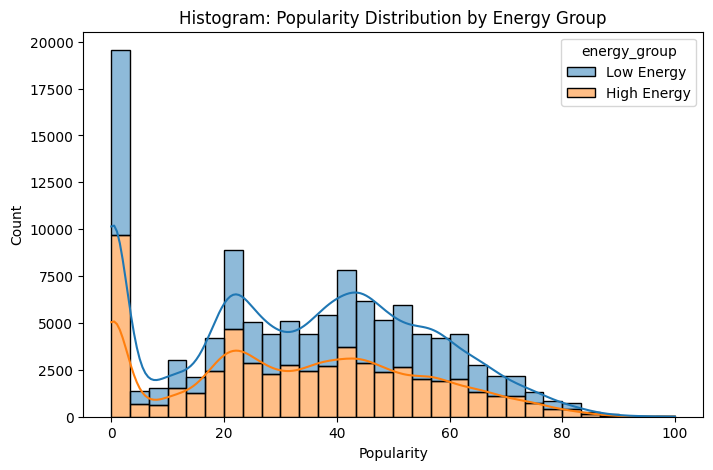

In [19]:
# Subset into "High Energy" and "Low Energy" at the median value
median_energy = spotify_df['energy'].median()
spotify_df['energy_group'] = np.where(spotify_df['energy'] >= median_energy, 'High Energy', 'Low Energy')

# Extract popularity for each group
high_energy_pop = spotify_df[spotify_df['energy_group'] == 'High Energy']['popularity']
low_energy_pop = spotify_df[spotify_df['energy_group'] == 'Low Energy']['popularity']

# Perform t-test
alpha = 0.01
t_stat2, p_val2 = ttest_ind(high_energy_pop, low_energy_pop)

# Interpret the t-test result
print(f"T-test result: t-statistic = {t_stat2:.3f}, p-value = {p_val2:.4f}")
if p_val2 < alpha:
  print(f"As the p-value is less than {alpha:.2}, we reject H0. Mean popularity differs by energy level.")
else:
  print(f"As the p-value is greater than or equal to {alpha:.2}, we fail to reject H0. Mean popularity does not differ by energy level.")

# Build the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=spotify_df, x='popularity', hue='energy_group', bins=30, kde=True, multiple='stack')
plt.title("Histogram: Popularity Distribution by Energy Group")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

From the histogram, we can see that there are a lot more low-energy songs overall, especially in the lower popularity range. High-energy songs, while fewer, are more evenly spread out across different popularity levels.
This suggests that while low-energy songs dominate in number, high-energy songs might have a better shot at being popular.
While the bars may be taller for low-energy songs, this just means that there are more of them, not that they are more popular. The distribution still suggests that energy may still play a role in increasing the popularity score.

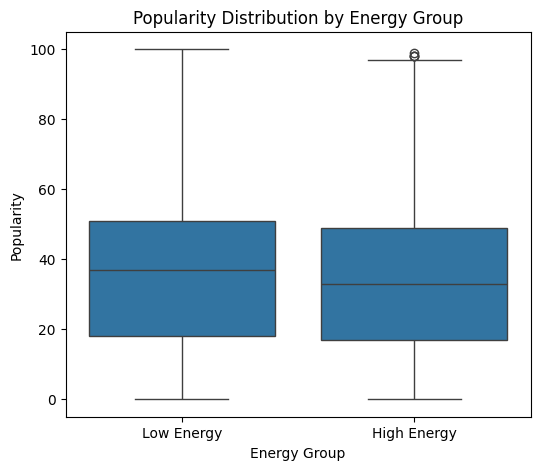

Mean popularity (High Energy): 32.75996201596736
Mean popularity (Low Energy): 33.890127725636866


In [20]:
# Boxplot of popularity by energy group
plt.figure(figsize=(6, 5))
sns.boxplot(data=spotify_df, x='energy_group', y='popularity')
plt.title("Popularity Distribution by Energy Group")
plt.xlabel("Energy Group")
plt.ylabel("Popularity")
plt.show()
# Print means
print("Mean popularity (High Energy):", high_energy_pop.mean())
print("Mean popularity (Low Energy):",  low_energy_pop.mean())


Based on the boxplot, the difference in popularity between high-energy and low-energy songs isn't very dramatic. Both groups have a similar range and spread, and their medians are pretty close.
This suggests that while energy might play a role in a song's popularity, it’s probably not the only factor. This supports the findings from our correlation matrix.  

There are also some outliers in the high-energy group, which means a few high-energy songs are extremely popular, but overall, the distributions look fairly balanced. While the t-test concludes the small difference in mean popularity between the energy groups is significant, the nearly identical ranges and means demonstrate that energy alone is a weak predictor of a song's popularity.

###**Hypothesis Test 3: Are Acoustic Songs Less Popular Than Non-Acoustic Songs?**

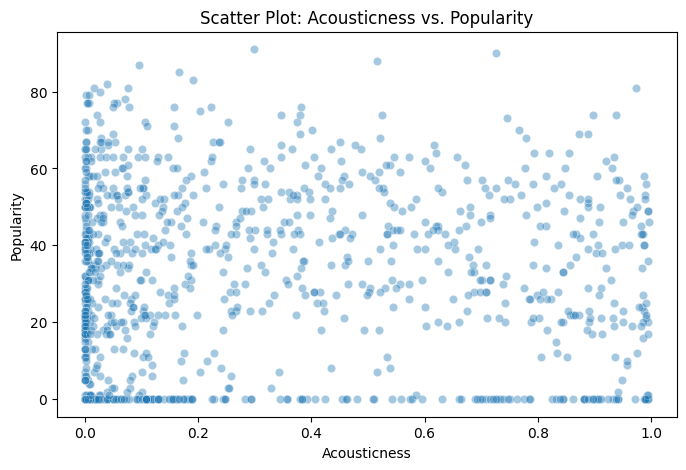

In [21]:
# Create scatter plot for Acousticness vs. Popularity
# ---------------------------------------------------

plt.figure(figsize=(8, 5))
sns.scatterplot(data=spotify_df.sample(1000), x='acousticness', y='popularity', alpha=0.4)
plt.title("Scatter Plot: Acousticness vs. Popularity")
plt.xlabel("Acousticness")
plt.ylabel("Popularity")
plt.show()

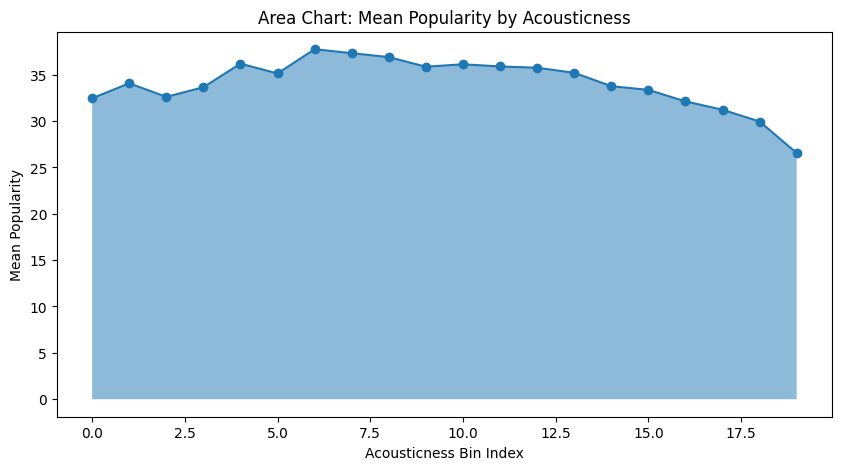

In [22]:
# Create the area chart for Mean Popularity by Acousticness
# ---------------------------------------------------------

# Create 20 equal bins of acousticness
spotify_df['acoustic_bin'] = pd.cut(spotify_df['acousticness'], bins=20)

# Compute the mean popularity in each bin
acoustic_area = spotify_df.groupby('acoustic_bin', observed = True)['popularity'].mean().reset_index()

# Build the chart
plt.figure(figsize=(10, 5))
plt.fill_between(acoustic_area.index, acoustic_area['popularity'], alpha=0.5)
plt.plot(acoustic_area.index, acoustic_area['popularity'], marker='o')
plt.title("Area Chart: Mean Popularity by Acousticness")
plt.xlabel("Acousticness Bin Index")
plt.ylabel("Mean Popularity")
plt.show()

The scatter plot and area chart show a slight negative relationship between acousticness and popularity.
Songs with higher acousticness tend to be less popular on average, supporting the hypothesis that acoustic tracks are generally less favored on mainstream platforms like Spotify.
This suggests that acousticness may be negatively correlated with popularity.

In [23]:
# Perform a hypothesis test: Are High-Acousticness Songs Less Popular?
# -----------------------------------------------------------

# Subset into two groups by acousticness
acoustic_df = spotify_df[spotify_df['acousticness'] >= 0.5]
non_acoustic_df = spotify_df[spotify_df['acousticness'] < 0.5]

# Extract the popularity values in the groups
acoustic_pop = acoustic_df['popularity']
non_acoustic_pop = non_acoustic_df['popularity']

# Perform the t-test
alpha = 0.01
t_stat, p_val3 = ttest_ind(non_acoustic_pop, acoustic_pop)

# Interpret the t-test result
print(f"T-test result: t-statistic = {t_stat:.3f}, p-value = {p_val3:.4f}")
if p_val3 < alpha:
    print(f"As the p-value is less than {alpha:.2f}, we reject H0. High-acousticness songs are less popular.")
else:
    print(f"As the p-value is greater than or equal to {alpha:.2f}, we fail to reject H0. Song popularity is not influenced by acousticness.")

T-test result: t-statistic = 9.551, p-value = 0.0000
As the p-value is less than 0.01, we reject H0. High-acousticness songs are less popular.


#**Machine Learning Analysis**



To explore what factors influence a song’s popularity, we built a supervised machine learning model to predict the `popularity_label` of a track.  The target variable (`popularity_label`) represents a categorical label indicating whether a track is low, medium, or high in popularity.

We selected four numerical audio features from the dataset: `danceability`, `energy`, `acousticness`, and `instrumentalness`.  These are commonly used in audio signal analysis and are good candidates for identifying popularity trends. We also selected a catagorial audio feature: `track_genre` that is also a good candidate for identifying popularity trends. This feature was encoded into a numerical feature, `genre_encoded`.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature columns
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'genre_encoded']

X = spotify_df[features]
y = spotify_df['popularity_label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(random_state=42, class_weight= 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the Random Forest model
print("=== Random Forest ===")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Use Logistic Regression as a baseline model
baseline = LogisticRegression(max_iter = 1000, random_state = 42, class_weight= 'balanced')
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)
print("\n=== Logistic Regression (Baseline) ===")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_baseline):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline, zero_division = 0))

=== Random Forest ===

Accuracy: 0.80

Confusion Matrix:
 [[ 4519  1411   197]
 [ 1255 10842   550]
 [  172   848  2916]]

Classification Report:
               precision    recall  f1-score   support

     Average       0.76      0.74      0.75      6127
     Popular       0.83      0.86      0.84     12647
   Unpopular       0.80      0.74      0.77      3936

    accuracy                           0.80     22710
   macro avg       0.79      0.78      0.79     22710
weighted avg       0.80      0.80      0.80     22710


=== Logistic Regression (Baseline) ===

Accuracy: 0.61

Confusion Matrix:
 [[2837  880 2410]
 [1404 9259 1984]
 [ 501 1750 1685]]

Classification Report:
               precision    recall  f1-score   support

     Average       0.60      0.46      0.52      6127
     Popular       0.78      0.73      0.75     12647
   Unpopular       0.28      0.43      0.34      3936

    accuracy                           0.61     22710
   macro avg       0.55      0.54      0.54 

Overall, the model has a decent accuracy of 80%, which means it will correctly predict the popularity of a song given its energy, danceability, acousticness, instrumentalness, and genre 80% of the time. However, the recall scores of average and unpopular songs are a bit lower than for popular songs. This may mean that the model have a lot of false negatives, where it will not label the song as unpopular or average when in actuality the song is unpopular or average.

Although the recall scores for unpopular and average may be low, the f1-scores for all three classes are all acceptable since they all are 0.75 and above, which is considered relatively good performance for real-world applications in industry.

To compare performance, we trained a baseline Logistic Regression model. This model performed significantly worse, with an overall accuracy of only 61%. Mostly, it predicted the "Popular" class, as evident from the confusion matrix. The recall for "Average" and "Unpopular" songs were 0.46 and 0.43, resulting in an F1-score of 0.52 and 0.34 for both classes. These results suggest that the model was unable to learn meaningful class boundaries. On the other hand, the Random Forest model had far better metrics due to its leveraging of decision trees.

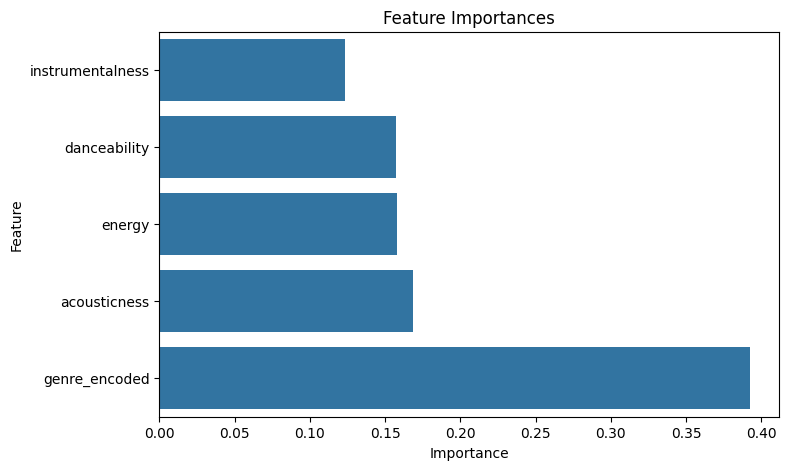

In [26]:
# Feature importances
importances = model.feature_importances_
feature_df = pd.Series(importances, index=features).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df, y=feature_df.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based off of the Features Importances graph, `genre_encoded` has the most influence on the popularity potential of a song by far. Danceability and energy have similar importance, while instrumentalness has the least importance. Thus, the song genre is significantly more important than the others for song popularity. However, for the other features, song popularity most likely depends on a multitude of `instrumentalness`, `danceability`, `energy`, and `acousticness`.

#**Visualization**

A confusion matrix can help visualize the performance of the machine learning model.

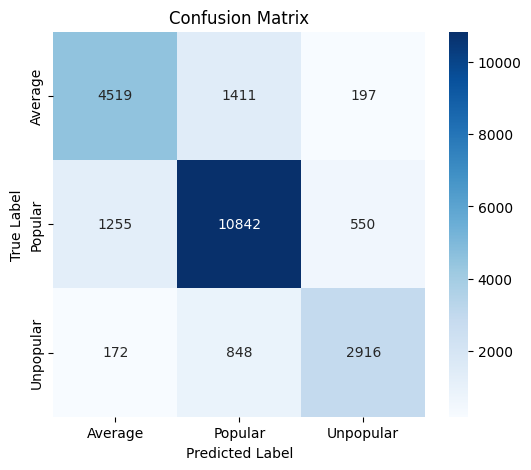

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The model has correctly predicted 10,842 "Popular" popularity songs. However, it has also mislabeled 848 "Unpopular" songs and 1,411 "Average" songs as "Popular." These numbers suggest the model heavily leans towards predicting "Popular", likely because it is the most represented class in the dataset. Defaulting to "Popular" in this manner shows a class imbalance bias. The model is less effective at predicting the minority classes, further supporting the idea of a class imbalance issue. This can be remedied through class-balancing techniques.

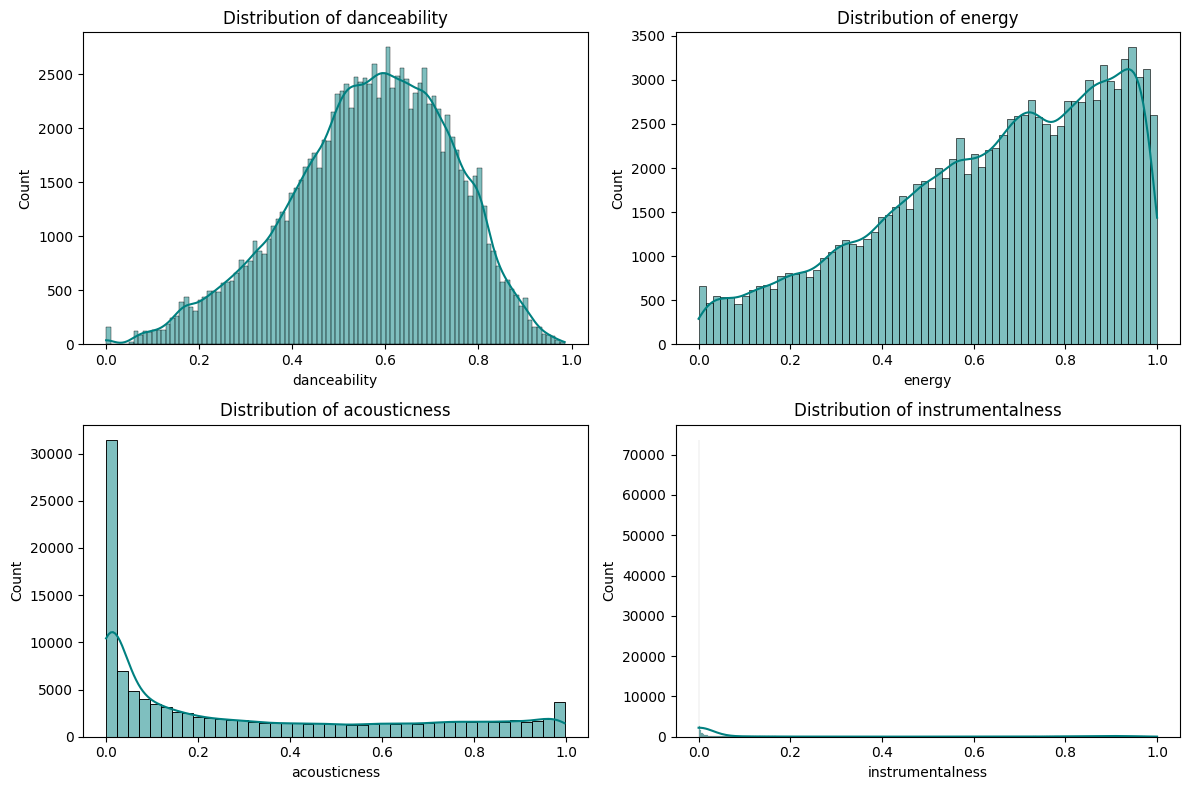

In [28]:
features = ['danceability', 'energy', 'acousticness', 'instrumentalness']

plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=spotify_df, x=col, kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

The histograms show that acousticness and instrumentalness are heavily imbalanced and are dominated by low values. In contrast, danceability and energy have more variation, especially danceability which assumes a near-normal distribution.

In particular, the acousticness plot offers further insight into feature importances because of its zero-heavy distribution, with the large group at 0 explaining why a single split on acousticness can cause a significant drop in impurity. The few songs with nonzero acousticness form a group that the Random Forest model can split off immediately, separating multiple outliers. One split, such as acousticness > 0.01, reduces a large amount of impurity which causes it to score highly on the feature importance chart.

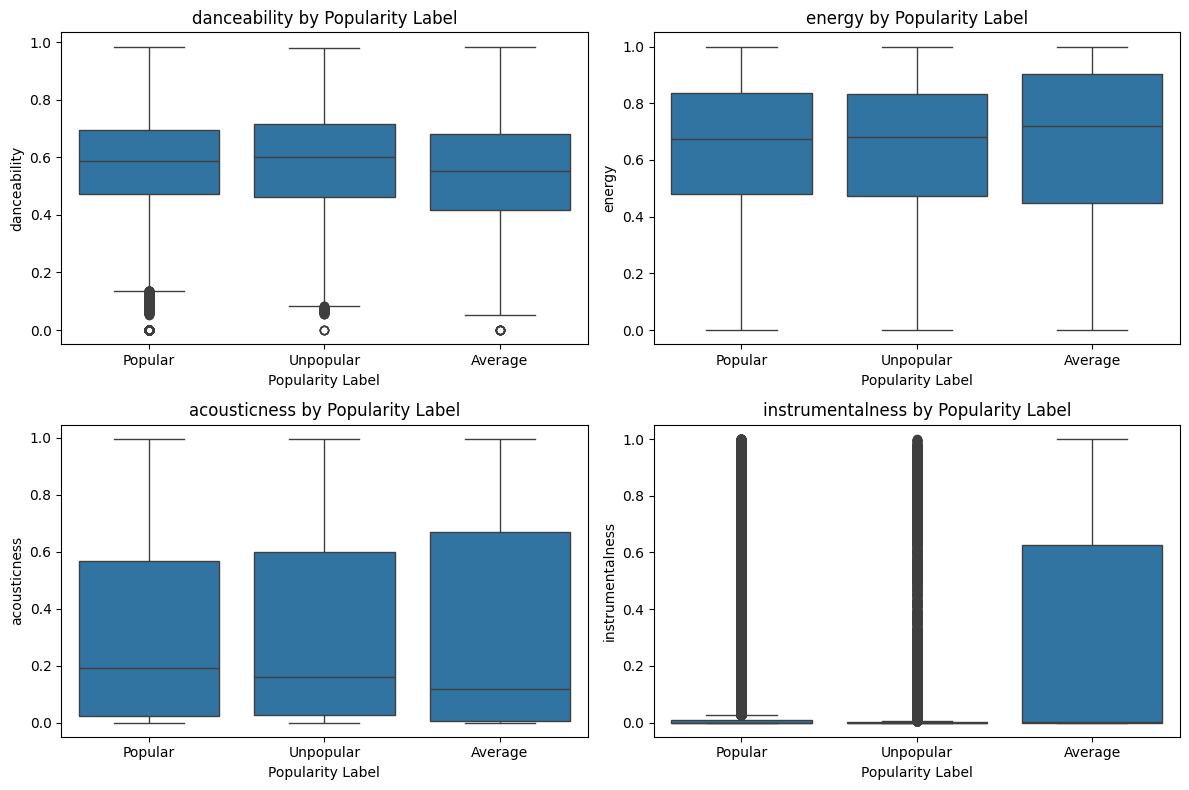

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='popularity_label', y=col, data=spotify_df)
    plt.title(f'{col} by Popularity Label')
    plt.xlabel('Popularity Label')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

The boxplots show that popular songs have a median danceability of around 0.59, compared to the median of 0.60 for unpopular songs. Similarly, energy score is slightly higher for unpopular songs than for popular songs. While songs with a high instrumentalness score are generally rare, they occur most frequently in the "Unpopular" class.

As for acousticness score, the median for popular songs is the highest of all the classes. This, at first, may seem to contradict our earlier findings that high-acoustic songs are less popular. However, the earlier hypothesis test split on acousticness at a score of 0.5 and compared their mean popularity. This is in contrast to this box plot, where we show each popularity class's acousticness distribution. In other words, popular songs are slightly more acoustic than unpopular songs, but higher-acousticness songs (>0.5) are usually less popular because more popular songs live below the 0.5 cutoff. This is a good example of a general trend (median) differing from extreme behavior as high acousticness songs are far less represented in the data.

## **Insights and Conclusions**
* Certain music genres have a higher median song popularity than others.
  * Thus, songs that fall in under certain genres may have a higher likelihood to be popular.

* Neither danceability, energy, or acousticness alone are effective at predicting a popular song through a machine learning model, despite hypothesis test results suggesting there is a significant difference between popularity classes.
  * The relationship between song features and popularity is not linear.
  * Small differences in such a large dataset cause the t-test to reject the null hypothesis, even if their feature scores only slightly differ.
  * This shows that statistical significance does not always equate to practical significance.
* Song genre has the greatest influence on song popularity compared to instrumentalness, danceability, acousticness, and energy.
  * Genre is significantly more important for popularity than the other features.
  * The most popular genres are pop, pop-film, and kpop.
* Since there is no single feature that is significantly more important than the others, popularity most likely depends on multiple features rather than a single one.
* The vast majority of popular songs have little to no instrumentalness, making it a key feature to observe if you are trying to produce a popular song.
  * Songs that have more instrumentalness tend to be less popular.
* Generally, popular songs are slightly more acoustic than unpopular songs. However, songs with high acousticness scores (>0.5) rarely become popular, bringing down the mean popularity for highly acoustic songs.
* Despite the lack of correlation between single audio features and popularity, all classes having an F1-score of above .75 show that the model is effective enough for industry use.
  * This further reinforces the idea that when combined, the audio features can predict the popularity of a song even if they have little to no impact on their own.
* A sample's trends can differ significantly compared to the entire dataset.
  * For example, in our sample the mean danceability score for popular songs was the highest among all popularity classes. This differs from the entire dataset, where the mean danceability score for the "Popular" class is lower than the "Unpopular" class.
* It is important to remember that popularity is not determined solely by the song itself, but it can be influenced by release timing, artist popularity, marketing, or other outside factors.